
0: 800x800 86 circles, 8.2ms
Speed: 7.0ms preprocess, 8.2ms inference, 2.6ms postprocess per image at shape (1, 3, 800, 800)


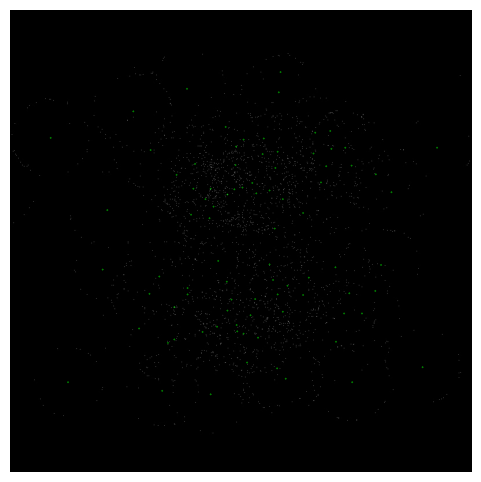

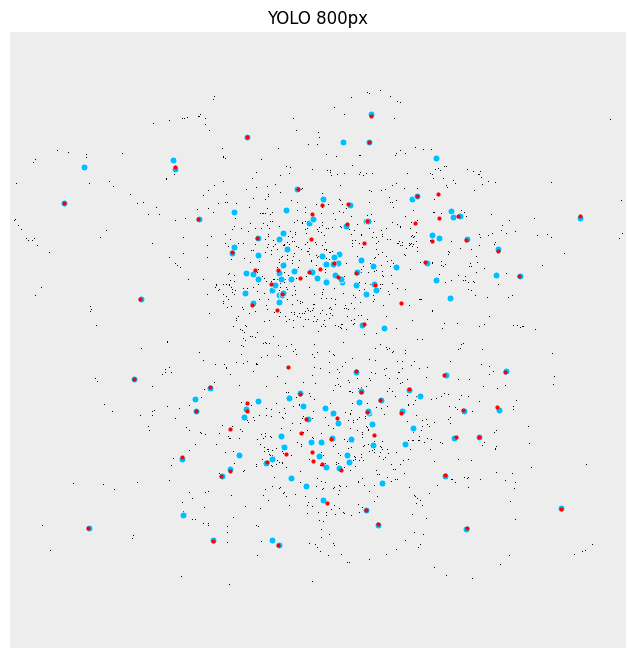

([0.6744186046511628,
  0.7674418604651163,
  0.7906976744186046,
  0.8023255813953488],
 [0.38666666666666666, 0.44, 0.4533333333333333, 0.46],
 [0.4915254237288136,
  0.5593220338983051,
  0.576271186440678,
  0.5847457627118644])

In [1]:
import sys

sys.path.append(r'/user/gr1/delphi/dghezzi/KeyPoint_Detection')

import KP as kpl
import numpy as np
from torch import Tensor

image_path = r'/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/images/val/event_8.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/labels/val/event_8.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/training_output/weights/last.pt'

results = kpl.inference(image_path, model_path, confidence=0.4, show_image=True, save_image=False)
kpl.show_with_MCpoints_new(results, txt_path, image_path, show_image=True, save_image=False, img_size=(800, 800), title='YOLO 800px')

pred_points = [(float(x), float(y)) for r in results if r.keypoints is not None for kp in r.keypoints.xy for x,y in kp]
gt_points   = np.loadtxt(txt_path, usecols=(-3, -2)) * (800, 800)

pred_points = np.array(pred_points, dtype=float)
gt_points   = np.array(gt_points, dtype=float)

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[4, 7, 7.6, 8])

# Pesi delle loss
box: 3.0
cls: 0.5
dfl: 0.6
pose: 20.0
kobj: 4.0

==> last.pt @4px: p=0.503, r=0.771, f1=0.609 (confidence=0.4)


[INFO] Calcolo con conf=0.02 ...

[INFO] Calcolo con conf=0.04 ...

[INFO] Calcolo con conf=0.06 ...

[INFO] Calcolo con conf=0.08 ...

[INFO] Calcolo con conf=0.10 ...

[INFO] Calcolo con conf=0.12 ...

[INFO] Calcolo con conf=0.14 ...

[INFO] Calcolo con conf=0.16 ...

[INFO] Calcolo con conf=0.18 ...

[INFO] Calcolo con conf=0.20 ...

[INFO] Calcolo con conf=0.22 ...

[INFO] Calcolo con conf=0.24 ...

[INFO] Calcolo con conf=0.26 ...

[INFO] Calcolo con conf=0.28 ...

[INFO] Calcolo con conf=0.30 ...

[INFO] Calcolo con conf=0.32 ...

[INFO] Calcolo con conf=0.34 ...

[INFO] Calcolo con conf=0.36 ...

[INFO] Calcolo con conf=0.38 ...

[INFO] Calcolo con conf=0.40 ...

[INFO] Calcolo con conf=0.42 ...

[INFO] Calcolo con conf=0.44 ...

[INFO] Calcolo con conf=0.46 ...

[INFO] Calcolo con conf=0.48 ...

[INFO] Calcolo con conf=0.50 ...

[INFO] Calcolo con conf=0.52 ...

[INFO] Calcolo con conf=0.54 ...

[INFO] Calcolo con conf=0.56 ...

[INFO] Calcolo con conf=0.58 ...

Calcolata F1 

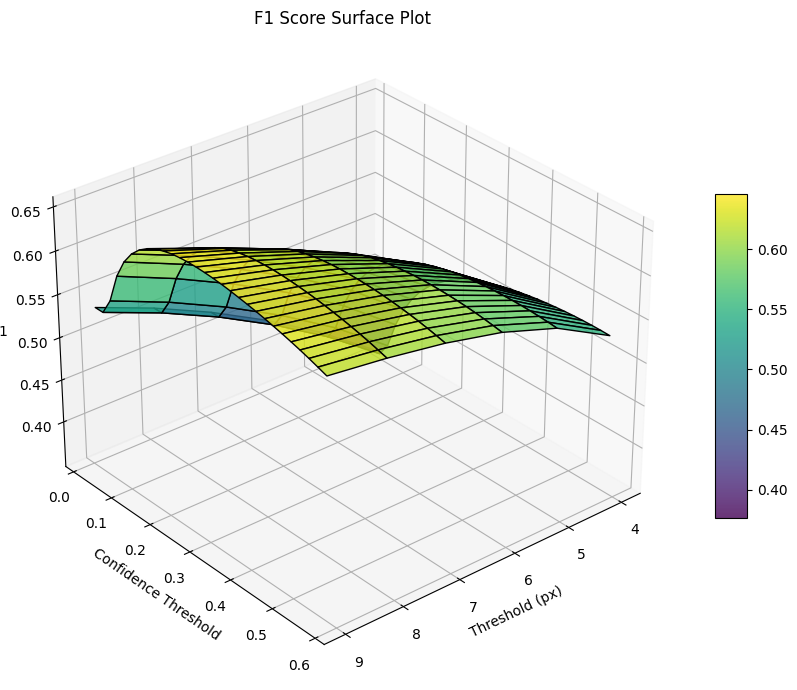

In [12]:
from KP import inference_F1map
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/training_output/weights/last.pt'
images_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/images/val'
txt_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/labels/val'

f1_matrix = inference_F1map(images_path, txt_path, model_path, thresholds=[4, 5, 6, 7, 8, 9], conf_thresholds=np.arange(0.02, 0.6, 0.02), img_size=800)

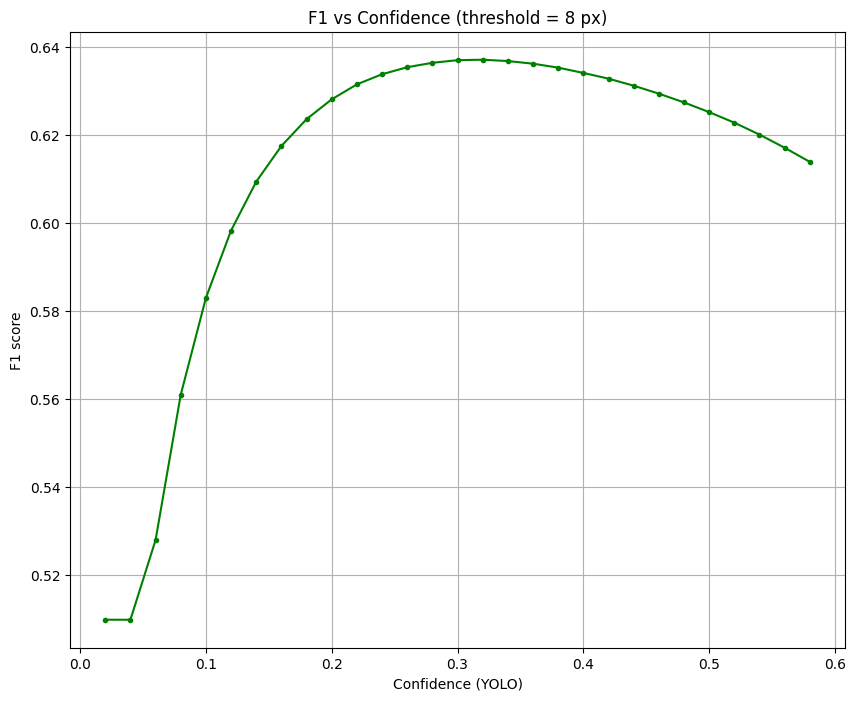

Max F1 score = 0.637 at confidence threshold = 0.32


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# leggi i file salvati
f1_matrix = pd.read_csv(
    '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/F1_matrix.csv',
    header=None
).values

thresholds = np.loadtxt('/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/F1_axis_thresholds_px.csv', delimiter=',')
confidences = np.loadtxt('/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/F1_axis_confidences.csv', delimiter=',')


# trova la colonna corrispondente a threshold=8
idx = np.where(thresholds == 8)[0][0]
f1_at_threshold = f1_matrix[:, idx]

# plot 2D
plt.figure(figsize=(10,8))
plt.plot(confidences, f1_at_threshold, marker='.', color='green')
plt.xlabel("Confidence (YOLO)")
plt.ylabel("F1 score")
plt.title("F1 vs Confidence (threshold = 8 px)")
plt.grid(True)
plt.show()

max_confidence = confidences[np.argmax(f1_at_threshold)]
print(f'Max F1 score = {np.max(f1_at_threshold):.3f} at confidence threshold = {max_confidence:.2f}')

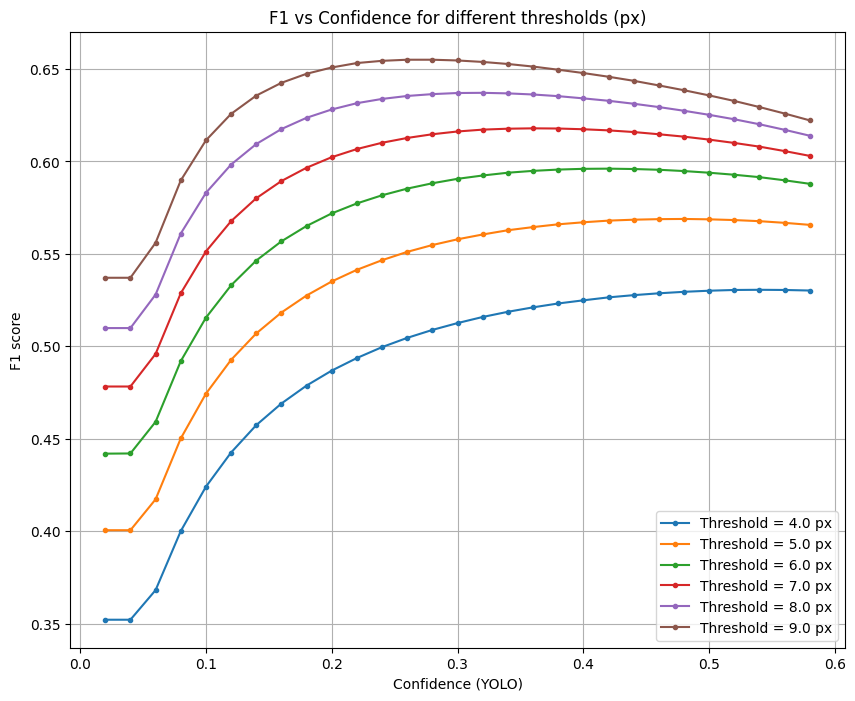

In [16]:
plt.figure(figsize=(10,8))
for i, thr in enumerate(thresholds):
    plt.plot(confidences, f1_matrix[:, i], marker='.', label=f'Threshold = {thr} px')

plt.xlabel("Confidence (YOLO)")
plt.ylabel("F1 score")
plt.title("F1 vs Confidence for different thresholds (px)")
plt.legend()
plt.grid(True)
plt.show()

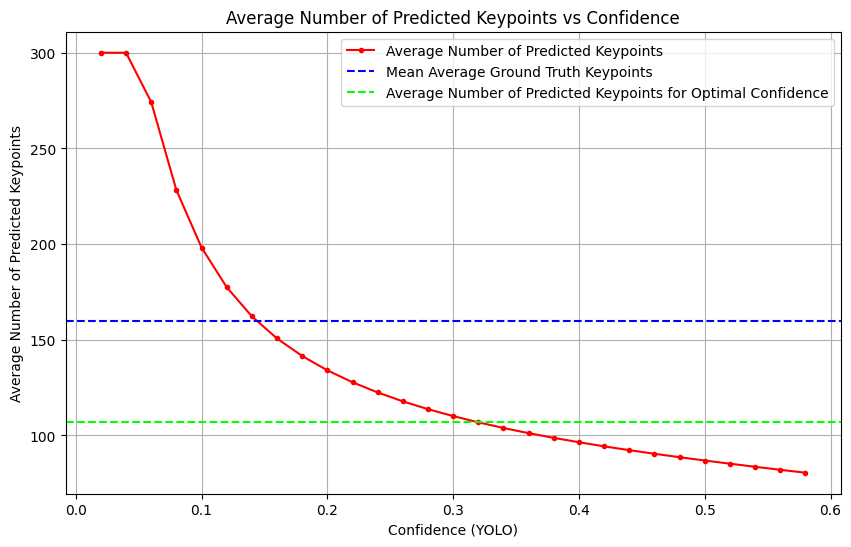

Number of average predicted keypoints at optimal confidence = 106.85


In [19]:
average_pred = pd.read_csv(
    '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/avg_preds_per_conf.csv',
    header=None
).values.flatten()  # assicura array 1D

plt.figure(figsize=(10,6))
plt.plot(confidences, average_pred, marker='.', color='red', label='Average Number of Predicted Keypoints')
plt.axhline(y=160, color='blue', linestyle='--', label='Mean Average Ground Truth Keypoints')
plt.axhline(y=average_pred[np.argmax(f1_at_threshold)], color='lime', linestyle='--', label='Average Number of Predicted Keypoints for Optimal Confidence')
plt.xlabel("Confidence (YOLO)")
plt.ylabel("Average Number of Predicted Keypoints")
plt.title("Average Number of Predicted Keypoints vs Confidence")
plt.legend()
plt.grid(True)
plt.show()
print(f'Number of average predicted keypoints at optimal confidence = {average_pred[np.argmax(f1_at_threshold)]:.2f}')

In [2]:
from KP import inference_setImages

model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/training_output/weights/last.pt'
images_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/images/val'
txt_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/labels/val'

thresholds = [8]

stats = inference_setImages(images_path, txt_path, model_path, thresholds=thresholds, img_size=800, confidence=0.34)
print(stats)


== Average results over 12778 images ==
Threshold 8.0px ==> Precision: 0.805 | Recall: 0.527 | F1: 0.637
Inference time: ( 15.496 ± 0.044 ) ms/image
Predicted keypoints: ( 103.89 ± 0.06 ) per image
{'thresholds': [8], 'precision': array([    0.80504]), 'recall': array([    0.52737]), 'f1': array([    0.63682]), 'avg_inference_time_sec': 0.015495881188697594, 'std_inference_time_sec': 4.403504067411453e-05, 'avg_pred_keypoints': 103.88707152919079, 'std_pred_keypoints': 0.057703216911144814, 'mean_red_precision': [0.7647058823529411], 'mean_red_recall': [0.4297520661157025], 'mean_red_f1': [0.5502645502645503], 'mean_number_predKP_centered': 68.0, 'mean_number_gtKP_centered': 121.0, 'mean_per_precision': [0.8846153846153846], 'mean_per_recall': [0.7666666666666667], 'mean_per_f1': [0.8214285714285715], 'mean_number_predKP_peripheral': 26.0, 'mean_number_gtKP_peripheral': 30.0}
